# Data Visualization

1.   List item
2.   List item



**Numeric** ve **Categoric** veri tiplerimiz var.  
Kedi-köpek ya da sıcak-soğuk gibi nitel veriler **categoric** verilerdir.  
Eğer categoric verilerle tahminleme yapıyorsak **Classification** problemi çözüyoruz.  
İnsan yaşları gibi numeric verilerle tahminleme yapıyorsak **Regression** problemi çözüyoruz.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#kütüphanelerimizi ekledik.

In [3]:
df = pd.read_csv("datasets_228_482_diabetes.csv")
#kaggle isimli klasördeki .csv uzantılı veri setimizi aldık.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Veri Setinin Hikayesi

Veri kümesinin amacı, veri kümesine dahil edilen belirli tanı ölçümlerine dayanarak bir hastanın diyabet olup olmadığını teşhis amaçlı olarak tahmin etmektir.  
Veri kümeleri birkaç tıbbi öngörücü değişken ve bir hedef değişkenden oluşur, **Outcome**.<br>
Tahmin değişkenleri hastanın sahip olduğu gebelik sayısını, BMI'sını, insülin seviyesini, yaşını vb. İçerir.

* **Pregnancies**: Hamile sayısı
* **Glucose**: Oral glukoz tolerans testinde 2 saatteki plazma glikoz konsantrasyonu
* **BloodPressure**: Diyastolik kan basıncı (mm Hg)
* **SkinThickness**: Triceps deri kat kalınlığı (mm)
* **Insulin**: 2 saatlik serum insülini (mu U / ml)
* **BMI**: Vücut kitle indeksi (kg olarak ağırlık / (m olarak yükseklik) ^ 2)
* **DiabetesPedigreeFunctio**: Diyabet soyağacı işlevi
* **Age**: Yaş
* **Outcome**: Sonuç (1 yada 0)

**Outcome** categoric, diğer değişkenler ise numeric veri.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().any()
#Column'da bir tane bile null deger varsa True olur.

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.notna().any()
#Column'da bir tane bile dolu deger varsa True olur.

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool

In [ ]:
df.isna().all()
#tamamı null olan column'lar True olur.

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
df.notna().all()
#tamamı dolu olan column'lar True gelir.
#Hepsi True gelirse eksik veri yok demektir.

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool

In [9]:
df.isna().sum()
#degiskenlerdeki eksik veri sayisi.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#Sadece 1 tane sınıfımız var. Görselleştirirken 1 tane daha sınıfımız olsa iyi olabilir.
#Overweight adında yeni bir sınıf ekleyelim.
#Vücut kitle indeksi 25'den büyük ise 1 değil ise 0 olsun.

df["Overweight"] = [1 if x > 25 else 0 for x in df.BMI]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


## Veri Görselleştirme

### Relational Plots with Matplotlib

**Relational Plots** iki tane değişkenin arasındaki ilişkiyi gösteren grafiklerdir.<br>
* **Scatter Plot**: İki değişken arasındaki ilişkinin dağılımını veri noktalarıyla gösterir.
* **Lineplot**: İki değişken arasındaki ilişkiyi sürekli gösterir. Veri noktaları birbirine çizgilerle bağlıdır. (Zaman serilerinde kullanılır.)

* **s parametresi:** marker boyutu
* **c parametresi:** marker rengi, hangi değişkeni tuttuğu da yazılabilir.
* **alpha:** marker opaklığı

In [11]:
plt.rcParams.update({'font.size': 25})
#grafiklerimizdeki font size'ı bu şekilde güncelleyebiliriz.

In [12]:
sns.set_context("paper")

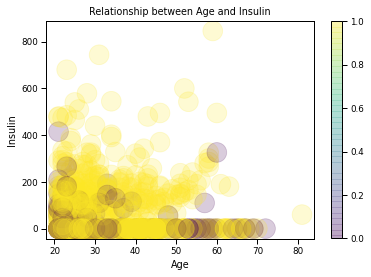

In [13]:
plt.scatter(df.Age, df.Insulin, c=df.Overweight, s=389,
            alpha=0.2, cmap="viridis") #cmap renk paleti
plt.colorbar(); #hangi rengin hangi değere denk geldiğini gösteren yandaki ölçek
plt.xlabel("Age") #eksen ismi
plt.ylabel("Insulin") 
plt.title("Relationship between Age and Insulin") #plot ismi
plt.show()

#insulin degerinde 0'da bir yığılma var ve bu bir sıkıntı. Olmaması gerekir.

![scatter](http://chartio.com/assets/5689fd/tutorials/charts/scatter-plots/a9b8dd5dc2057a70446e5aa32f32b49d54b55f5cabf17a4610e2da94bea7fed5/scatter-plot-example-2.png)

## Scatter plot with Subplots
subplot'ı bir plottan iki tane küçük plot çıkarıyoruz gibi düşünebiliriz.  
fig, ax = plt.subplots(): figure ve axes object oluşturur. figure’de her şey var, axes data’yı tutuyor.

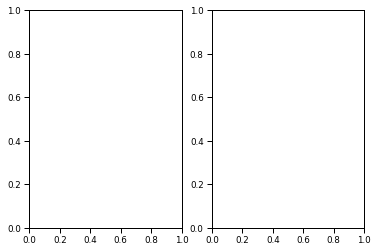

In [14]:
fig, ax = plt.subplots(1,2) #1 satir, 2 sütundan oluşan plot
plt.show()

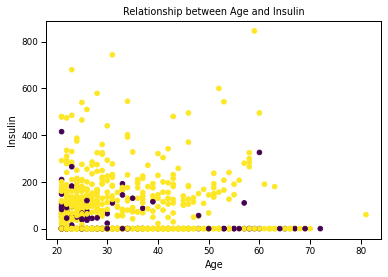

In [15]:
fig, ax = plt.subplots()
ax.scatter(df.Age, df.Insulin, c=df.Overweight, cmap="viridis")
ax.set_xlabel("Age")
ax.set_ylabel("Insulin")
ax.set_title("Relationship between Age and Insulin")
plt.show()

### Categorical Plots with Matplotlib

Categoric verilerin özelliklerine bakmamızı sağlar.

#### Histogram
Numerik ya da kategorik verilerde dağılımı yorumlamamıza yardımcı olur.

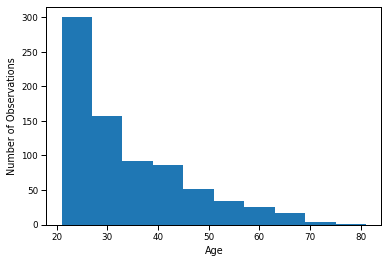

In [16]:
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age", bins=10) #bins: kaç aralığa bölünecek
ax.set_xlabel("Age") #axis isimleri
ax.set_ylabel("Number of Observations")
plt.show()

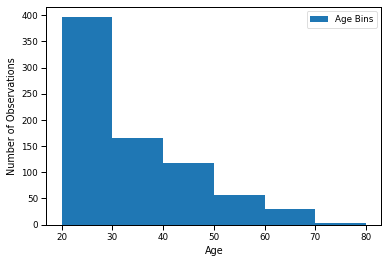

In [17]:
bins=[20,30,40,50,60,70,80] #bins'i manuel girdik.
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age Bins", bins=bins) 
ax.set_xlabel("Age") #axis isimleri
ax.set_ylabel("Number of Observations")
plt.legend()
plt.show()

#### Bar plot
Kategorik verilerin özelliklerine bakmamızı sağlar.

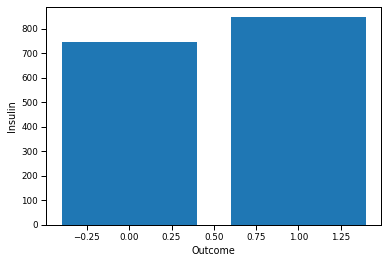

In [18]:
fig, ax = plt.subplots()
ax.bar(df.Outcome, df.Insulin)
ax.set_xlabel("Outcome")
ax.set_ylabel("Insulin")
plt.show()

### Figure Kaydetme

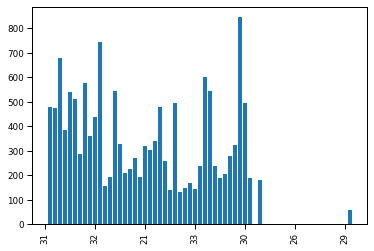

In [19]:
#Yaşlara göre insulin değerlerine bakalım.
fig, ax = plt.subplots()
ax.bar(df.Age, df.Insulin)
ax.set_xticklabels(df.Age, rotation=90) # x eksenindeki yazıların yazı yönü.
fig.savefig("Age.png", dpi=500) #png formatında kaydeder.

* **fig.savefig(“Age.png”):** kayıp olmadan kaydeder, yüksek kalitelidir ama çok hafıza tutar
* **fig.savefig(“Age.jpg”, quality=50):** websitesine konulabilir
* **fig.savefig(“Age.png”, dpi=200):** dots per inch, dense rendering
* **fig.set_size_inches([5,3]):** aspect ratio

## Seaborn
* **FacetGrid** (relplot(), catplot()) subplot'lar oluşturabilir.
* **AxesSubplot**(scatterplot, countplot) bir tane plot oluşturur.

### Count Plot

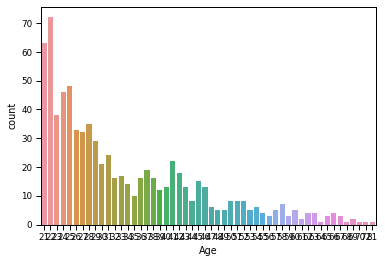

In [20]:
sns.set_palette("RdBu")
sns.countplot(x="Age", data=df)
plt.show()

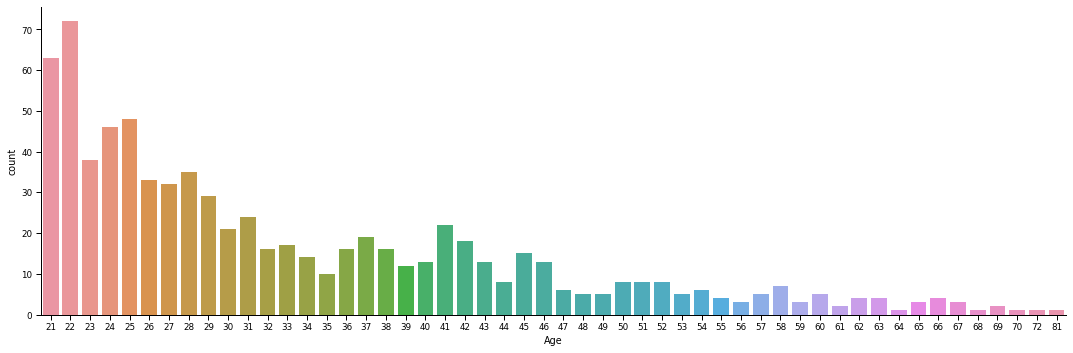

In [21]:
sns.catplot(x="Age", aspect=3, data=df, kind="count") #aspect = x ekseni, y ekseninin 3 katı kadar olsun.
plt.show()

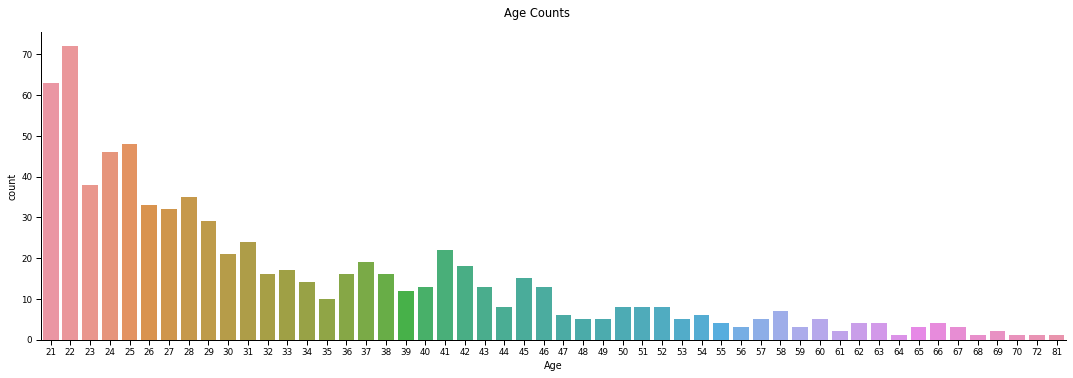

In [22]:
g = sns.catplot(x="Age", aspect=3, data=df, kind="count")
g.fig.suptitle("Age Counts", y=1.04) #ismi yukarı çıkarıyor.
plt.show()

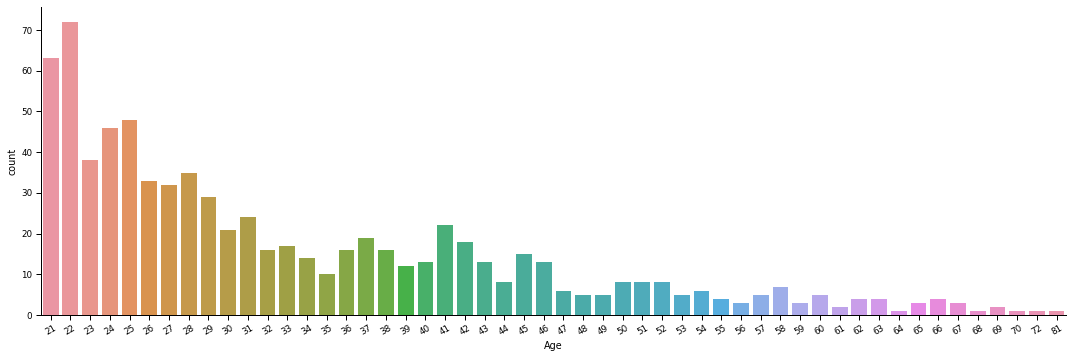

In [23]:
g = sns.catplot(x="Age", aspect=3, data=df, kind="count")
plt.xticks(rotation=30) #x eksenindeki isimleri 30 derece döndürür.
plt.show()

### Scatter Plot

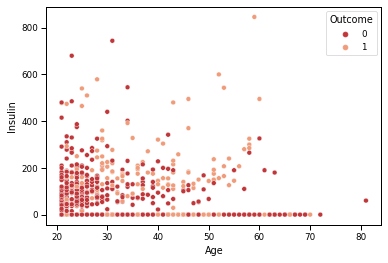

In [24]:
sns.scatterplot(x="Age", y="Insulin", data=df, hue="Outcome")
plt.show()

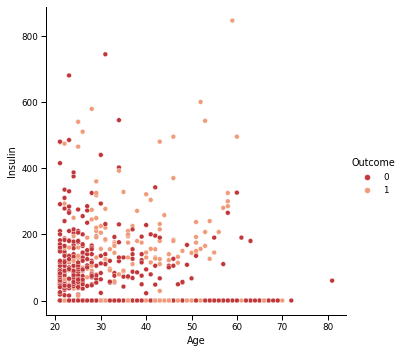

In [25]:
sns.relplot(x="Age", y="Insulin", data=df, hue="Outcome",
           kind="scatter")
plt.show()

### Line Plot

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


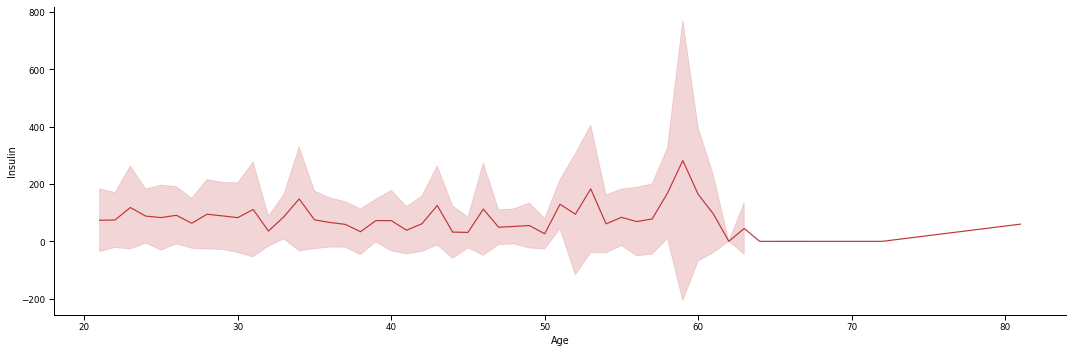

In [27]:
sns.relplot(x="Age", y="Insulin", data=df, kind="line", ci="sd", aspect = 3, markers=True, dashes=False)
plt.show()

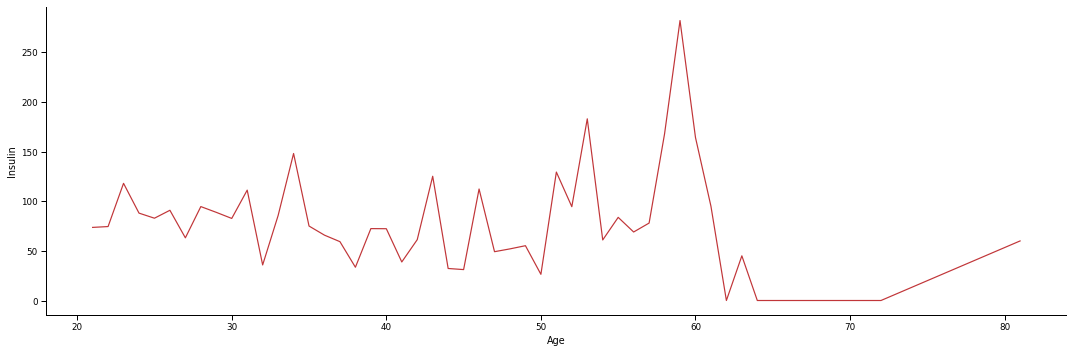

In [28]:
sns.relplot(x="Age", y="Insulin", data=df, kind="line", ci=None, aspect = 3, markers=True, dashes=False)
plt.show()

### Scatter Subplots

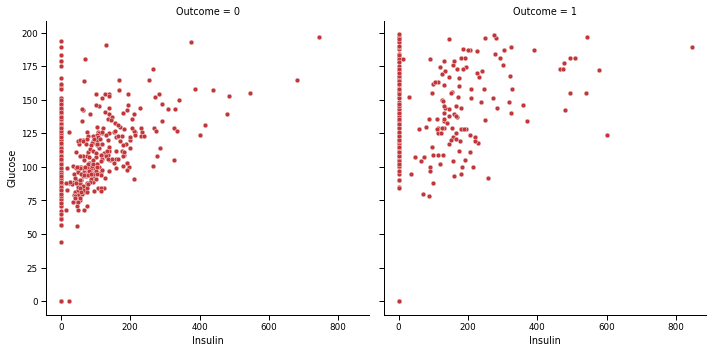

In [29]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", col="Outcome") #Glucose'a göre karşılaştırma
plt.show()

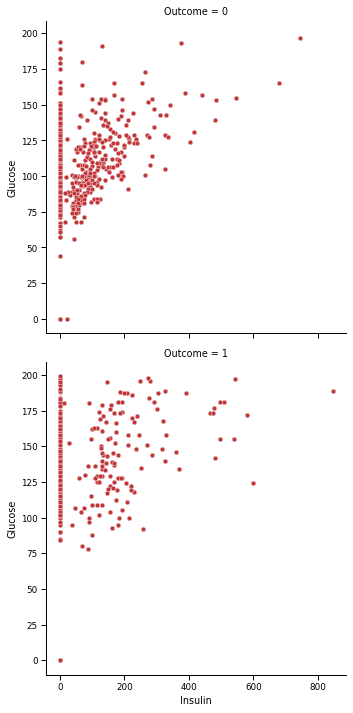

In [30]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", row="Outcome") #Insulin'e göre karşılaştırma
plt.show()

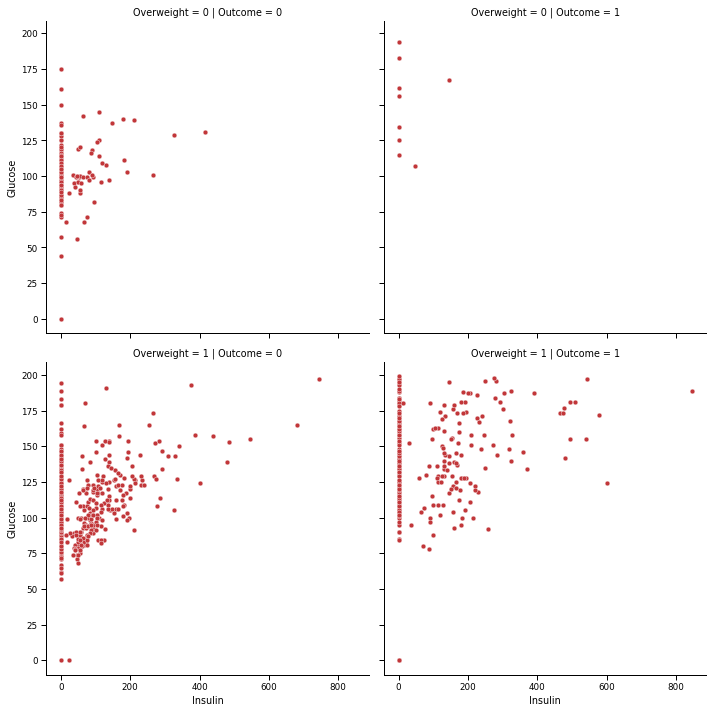

In [31]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter",col="Outcome", row="Overweight") 
plt.show()

### Heatmap

Öznitelikler arasındaki ilişkiye, korelasyona bakmamızı sağlar.<br>
Korelasyon ne kadar iyiyse makine öğrenmesi modelimiz o kadar düzgün çalışır.

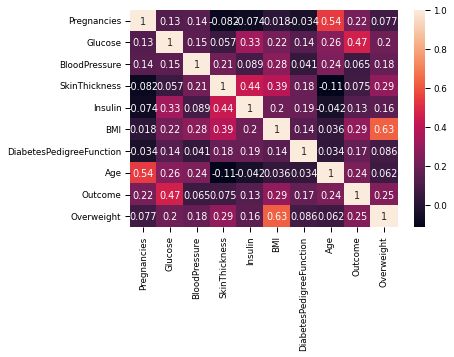

In [32]:
sns.set_palette("RdBu")
correlation=df.corr()
sns.heatmap(correlation, annot=True) #annot: corr degerlerini heatmap üzerine yazar.
plt.show()
#Renk ne kadar açıksa correlation o kadar yüksek demektir.

### Categorical Plots

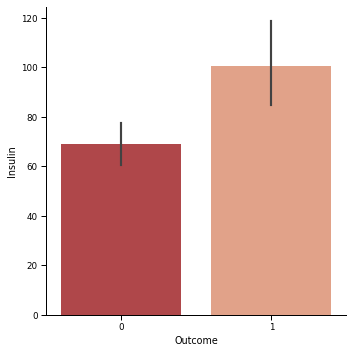

In [33]:
sns.catplot(x="Outcome",y="Insulin",data=df, kind="bar")
plt.show()

Bar plot bize kategorik veri hakkında bilgi verir.

### Box Plot
![boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

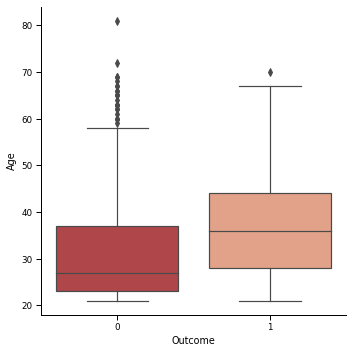

In [34]:
sns.catplot(x="Outcome",y="Age", data=df, kind="box")
plt.show()

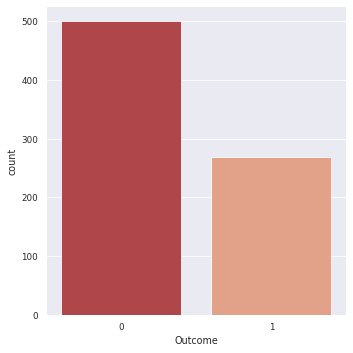

In [35]:
sns.set_style("darkgrid") #arka plan tasarımı
sns.catplot(x="Outcome", data=df, kind="count")
plt.show()

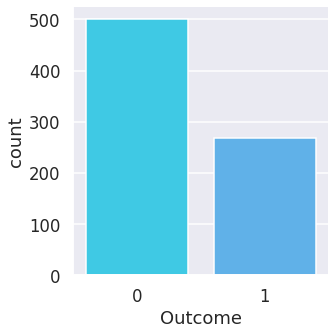

In [36]:
sns.set_context("talk") #Font size
sns.set_palette("cool") #color design
sns.catplot(x="Outcome", data=df, kind="count")
plt.show()